In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
from classifier.single_label_classifier import SingleLabelClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve, average_precision_score
from preprocessing.features import BASELINE_FEATURE_COLUMNS
from preprocessing.preprocessor import Preprocessor
from preprocessing.tags import Tags
from evaluation.utils import create_confusion_matrix, create_classification_report, create_precision_recall_graph, create_receiver_operation_characteristic_graph, create_error_matrix_graph, create_feature_importance_graph

/Users/philipphager/.local/share/virtualenvs/vandalism-classifier-WHUGQZpq/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/philipphager/.local/share/virtualenvs/vandalism-classifier-WHUGQZpq/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/philipphager/.local/share/virtualenvs/vandalism-classifier-WHUGQZpq/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
features = '../data/features-total-80c4772.csv'
preprocessor = Preprocessor(features, [Tags.BLANKING], BASELINE_FEATURE_COLUMNS, vandalism_sample_rate=0.3)
output = preprocessor.run()
clf = SingleLabelClassifier(output, 300)

In [4]:
clf.cross_validate()

{'fit_time': array([1.51706004, 1.45581579, 1.48647594, 1.56385708, 1.63505793,
        1.66332102, 1.69625974, 2.12814784, 1.23983383, 1.18807793]),
 'score_time': array([0.5328021 , 0.73554516, 0.53321123, 0.52646399, 0.65194893,
        0.64458513, 0.7374332 , 0.53165007, 0.53155708, 0.53045297]),
 'test_f1': array([0.86046512, 0.8       , 0.81632653, 0.80487805, 0.87640449,
        0.81395349, 0.79012346, 0.79545455, 0.82105263, 0.72      ]),
 'test_precision': array([0.90243902, 0.85      , 0.75471698, 0.89189189, 0.86666667,
        0.83333333, 0.86486486, 0.79545455, 0.76470588, 0.64285714]),
 'test_recall': array([0.82222222, 0.75555556, 0.88888889, 0.73333333, 0.88636364,
        0.79545455, 0.72727273, 0.79545455, 0.88636364, 0.81818182]),
 'test_roc_auc': array([0.98279915, 0.96089744, 0.95267094, 0.95779915, 0.96918706,
        0.96470717, 0.91637246, 0.95311121, 0.94097529, 0.93203883]),
 'test_accuracy': array([0.91946309, 0.88590604, 0.87919463, 0.89261745, 0.92567568,
 

In [5]:
y_predict, y_predict_proba = clf.predict()
y = output.y

In [6]:
# Evaluate model parameters: Confusion matrix
create_confusion_matrix(y, y_predict)

,Predicted No Vandalism,Predicted Vandalism
True No Vandalism,950,86
True Vandalism,84,360


In [7]:
# Evaluate model parameters: Classification report
print(create_classification_report(y, y_predict))

              precision    recall  f1-score   support

No Vandalism       0.92      0.92      0.92      1036
   Vandalism       0.81      0.81      0.81       444

 avg / total       0.89      0.89      0.89      1480



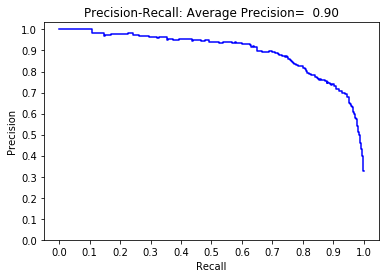

PR-AUC 0.8977174094210058


In [8]:
plt, pr_auc = create_precision_recall_graph(y, y_predict_proba[:,1])
plt.show()
print("PR-AUC", pr_auc)

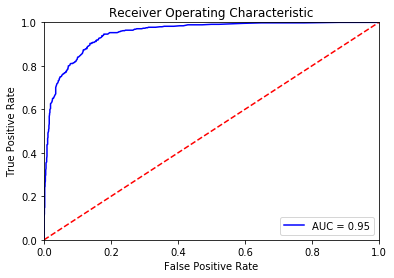

ROC-AUC 0.9511276479181884


In [9]:
plt, roc_auc = create_receiver_operation_characteristic_graph(y, y_predict_proba[:,1])
plt.show()
print("ROC-AUC", roc_auc)

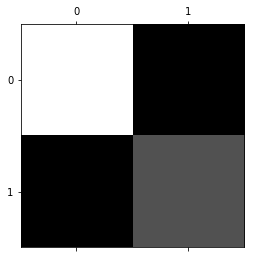

In [10]:
plt = create_error_matrix_graph(y, y_predict)
plt.show()

plt = create_feature_importance_graph(clf, output.labels)
plt.show()